In [2]:
import os
import numpy as np
from nilearn import plotting, image
import pandas as pd
import hcp_utils as hcp
import nilearn.connectome as nic
import matplotlib.pyplot as plt

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [122]:
file_path  = '/home/anmarkova/teams/a05/group_2/parcellations'
sub_list = os.listdir(file_path)
mmp = []
ca = []
sub_ids_mmp = []
sub_ids_ca = []
for i in sub_list:
    if 'mmp' in i:
        mmp_file = np.load(file_path+'/'+i)
        if mmp_file.shape == (3600, 379):
            sub_ids_mmp.append(int(re.search(r"sub-(\d+)", i).group(1)))
            mmp.append(np.load(file_path+'/'+i))
    if 'ca' in i:
        ca_file = np.load(file_path+'/'+i)
        if ca_file.shape == (3600, 718):
            sub_ids_ca.append(int(re.search(r"sub-(\d+)", i).group(1)))
            ca.append(ca_file)

In [131]:
ca_data = np.array(ca)

In [132]:
ca_data.shape

(172, 3600, 718)

In [107]:
sub_data = np.array(mmp)

In [146]:
sub_data = sub_data[:, :, 1:361]

In [147]:
#Correlation matrix
correlation_measure = nic.ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform(sub_data)

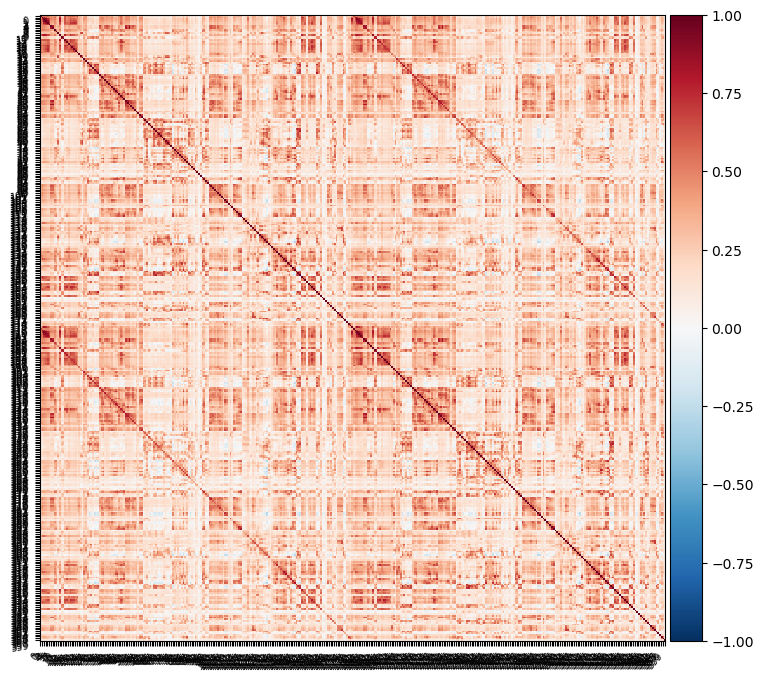

In [149]:
fig, ax = plt.subplots(figsize=(7, 7),
                       layout='constrained')
plotting.plot_matrix(
    correlation_measure.mean_, labels=range(0,360), colorbar=True, vmax=1, vmin=-1, figure=fig
)

In [154]:
def euclidean(point1, point2):
    distance = 0
    for i in range(len(point1)-1):
        distance += (point1[i] - point2[i]) ** 2
    return (distance) ** 0.5

In [155]:
def find_closest_point(atlas_coords, reference_point):
    dist = np.inf
    closest_idx = None
    points=[]
    for idx in range(len(atlas_coords)):
        i = atlas_coords[idx]
        curr_dist = euclidean(reference_point, i)
        if curr_dist < dist:
            dist = curr_dist
            closest_point = i
            closest_idx = idx
    print(dist, closest_point)
    return closest_idx

In [156]:
rois = {
    "Left M1": [-38, -24, 62],
    "Right M1": [34, -22, 62],
    "Left SMA" : [-8, 0, 54],
    "Right SMA" : [8, 0, 54],
    "Left PMd": [-16, -20, 48],
    "Right PMd": [34, -8, 52]}

In [158]:
mni_coordinates

,Region,MNI_x,MNI_y,MNI_z
0,1,-10.078265,-84.159427,1.758543
1,2,-44.735516,-67.289673,11.761965
2,3,-15.101997,-79.082739,30.835949
3,4,-12.044036,-82.059170,4.029322
4,5,-16.606670,-84.793414,7.258655
...,...,...,...,...
355,356,54.773684,-10.771053,-15.707895
356,357,64.920093,-24.603675,-15.518810
357,358,44.447070,-2.377127,-13.536862
358,359,9.604651,28.588551,30.208408


In [5]:
atlas_path = "/home/anmarkova/teams/a05/group_2/MNI_Glasser_HCP_v1.0.nii.gz"
atlas = image.load_img(atlas_path)
atlas = image.threshold_img(atlas, "99.5%") 

print("atlas has shape", ["x", "y", "z", "region"], "=", atlas.shape)

/tmp/ipykernel_421/1708466197.py:3: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas = image.threshold_img(atlas, "99.5%")


atlas has shape ['x', 'y', 'z', 'region'] = (256, 256, 256)


SyntaxError: 'return' outside function (1708466197.py, line 6)

In [8]:
get_atlas_coords(atlas)

DimensionError: Input data has incompatible dimensionality: Expected dimension is 4D and you provided a 3D image. See https://nilearn.github.io/stable/manipulating_images/input_output.html.

In [157]:
all_points = set()
for k, v in rois.items():
    print(f"Closest point to {k}:")
    closest = find_closest_point(mni_coordinates, v)
    all_points.add(closest)

Closest point to Left M1:


KeyError: 0

TypeError: Data given cannot be loaded because it is not compatible with nibabel format:
np.float64(-10.078...

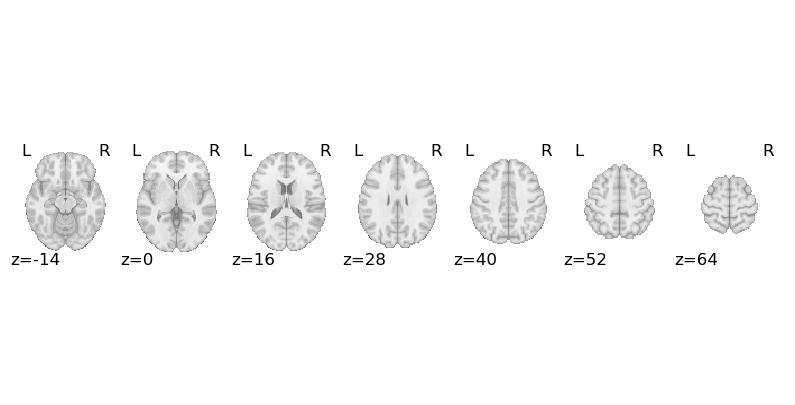

In [161]:
fig, axs = plt.subplots(nrows=1, figsize=(10, 5))
# selected_regions = image.index_img(atlas, list(all_points))
plotting.plot_prob_atlas(coords, colorbar=True, draw_cross=False, axes=axs, display_mode="z")
axs.set_title("Map of Brain Regions")

In [46]:
hcp.mmp.map_all

array([ 35,  52,  12, ..., 378, 378, 378], shape=(91282,))

In [50]:
hcp.view_parcellation(sub_data[0])

TypeError: view_parcellation() missing 1 required positional argument: 'parcellation'

In [58]:
#loading atlas parcelations
def load_atlas(file_path=None):
    '''
    loads txt data of all subjects

    params:
    n (int): number of brain regions options: 15, 50, 100; 100 by default
    file_path: your own filepath

    return:
    all data (np.array): 
    '''
    if not file_path:
        file_path = f"/home/anmarkova/teams/a05/group_2/HCP_PTN1200/groupICA/groupICA_3T_HCP1200_MSMAll_d{n}.ica/melodic_IC_sum.nii.gz"
    atlas = image.load_img(file_path)
    atlas = image.threshold_img(atlas, "99.5%") 

    print("atlas has shape", ["x", "y", "z", "region"], "=", atlas.shape)
    return atlas

In [60]:
atlas = load_atlas('/home/anmarkova/teams/a05/group_2/MNI_Glasser_HCP_v1.0.nii.gz')

/tmp/ipykernel_581/3615962180.py:16: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas = image.threshold_img(atlas, "99.5%")


atlas has shape ['x', 'y', 'z', 'region'] = (256, 256, 256)


In [7]:
def get_atlas_coords(atlas):
    #plotting connections on the brain
    atlas_coords = plotting.find_probabilistic_atlas_cut_coords(atlas)
    atlas_coords = np.array(atlas_coords)
    return atlas_coords

In [64]:
get_atlas_coords(atlas)

DimensionError: Input data has incompatible dimensionality: Expected dimension is 4D and you provided a 3D image. See https://nilearn.github.io/stable/manipulating_images/input_output.html.

In [ ]:
import nibabel as nib
import numpy as np
import pandas as pd
from scipy.ndimage import center_of_mass

def extract_mni_coordinates(atlas_path):
    """ Extracts the center of mass MNI coordinates for each parcel in an atlas. """
    # Load atlas
    atlas_img = nib.load(atlas_path)
    atlas_data = atlas_img.get_fdata()
    affine = atlas_img.affine  # Affine matrix to convert voxel to MNI

    # Get unique regions (excluding 0, which is background)
    regions = np.unique(atlas_data)
    regions = regions[regions > 0]  # Remove background

    # Compute center of mass for each region
    mni_coords = {}
    for region in regions:
        coords = np.array(np.where(atlas_data == region))
        com_voxel = np.mean(coords, axis=1)  # Compute center of mass in voxel space
        com_mni = nib.affines.apply_affine(affine, com_voxel)  # Convert to MNI space
        mni_coords[int(region)] = com_mni

    # Convert to DataFrame
    df = pd.DataFrame(mni_coords).T
    df.columns = ["MNI_x", "MNI_y", "MNI_z"]
    df.index.name = "Region"
    
    return df

# Usage
atlas_path = "/home/anmarkova/teams/a05/group_2/MNI_Glasser_HCP_v1.0.nii.gz"
mni_coordinates = extract_mni_coordinates(atlas_path)
print(mni_coordinates.head())

In [135]:
mni_coordinates = mni_coordinates.reset_index()

ValueError: Invalid shape for 'node_coords'. You passed an 'adjacency_matrix' of shape (379, 379) therefore 'node_coords' should be a array with shape (379, 3) while its shape was (360, 4).

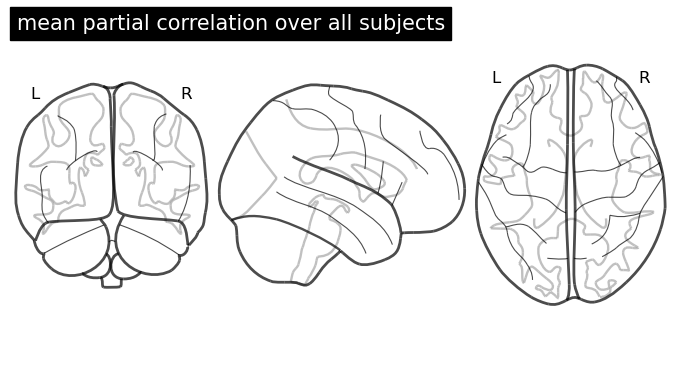

In [144]:
plotting.plot_connectome(
    correlation_measure.mean_,
    mni_coordinates,
    title="mean partial correlation over all subjects",
    edge_threshold="98%", colorbar=True
)

In [142]:
mni_coordinates['Region'] = mni_coordinates.reset_index()['index'] + 1

In [159]:
coords = mni_coordinates.loc[:, ['MNI_x', 'MNI_y', 'MNI_z', 'Region']].to_numpy()

In [160]:
coords

array([[-10.07826528, -84.15942659,   1.7585433 ,   1.        ],
       [-44.73551637, -67.28967254,  11.76196474,   2.        ],
       [-15.10199715, -79.08273894,  30.83594864,   3.        ],
       ...,
       [ 44.44706994,  -2.37712665, -13.536862  , 358.        ],
       [  9.60465116,  28.58855098,  30.20840787, 359.        ],
       [  4.87796888,  37.00737101,  15.17772318, 360.        ]],
      shape=(360, 4))

In [72]:
sub_data.shape

(172, 3600, 379)

In [74]:
hcp.mmp.ids

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [77]:
np.array(mni_coordinates.index)

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

In [79]:
#load restricted data
def load_restricted(file_path=None):

    if not file_path:
        file_path = "/home/anmarkova/teams/a05/group_2/RESTRICTED_BEHAVIORAL_DATA.csv"
    data = pd.read_csv(file_path)
    print('restricted_data loaded')
    return data

#getting handedness
def get_handedness(sub_id, n=100, file_path_n=None, file_path_restricted = None):
    df = load_restricted(file_path_restricted)
    handedness = df.set_index("Subject").loc[sub_id][["Handedness"]]
    return handedness

In [102]:
import re
subject_ids = [int(re.search(r"sub-(\d+)", filename).group(1)) for filename in sub_list if ('mmp' in filename)]
print(subject_ids)

[182739, 175237, 105923, 146129, 169747, 251833, 547046, 176542, 167440, 201515, 203418, 751550, 412528, 732243, 397760, 195041, 233326, 833249, 818859, 116726, 144226, 177746, 150423, 429040, 318637, 352738, 581450, 826353, 951457, 525541, 995174, 102311, 436845, 169444, 164636, 146432, 381038, 158136, 172130, 192439, 552241, 177140, 221319, 164131, 169343, 463040, 108323, 263436, 171633, 249947, 782561, 102816, 187345, 725751, 958976, 771354, 380036, 148133, 927359, 385046, 585256, 770352, 157336, 197348, 966975, 871762, 789373, 859671, 100610, 196144, 601127, 173334, 680957, 283543, 239136, 644246, 706040, 638049, 971160, 617748, 169040, 134627, 178142, 654552, 898176, 878877, 191336, 111514, 365343, 572045, 214524, 181232, 783462, 395756, 167036, 204521, 346137, 104416, 193845, 191841, 156334, 541943, 134829, 140117, 177645, 814649, 109123, 825048, 178647, 128935, 765864, 115825, 872764, 473952, 135124, 627549, 212419, 910241, 200210, 330324, 973770, 192641, 115017, 114823, 406836,

In [113]:
df = load_restricted()

restricted_data loaded


In [111]:
len(sub_ids)

172

In [114]:
df = df.set_index('Subject')
df.loc[sub_ids]

,Age_in_Yrs,HasGT,ZygositySR,ZygosityGT,Family_ID,Mother_ID,Father_ID,TestRetestInterval,Race,Ethnicity,...,SSAGA_Times_Used_Illicits,SSAGA_Times_Used_Cocaine,SSAGA_Times_Used_Hallucinogens,SSAGA_Times_Used_Opiates,SSAGA_Times_Used_Sedatives,SSAGA_Times_Used_Stimulants,SSAGA_Mj_Use,SSAGA_Mj_Ab_Dep,SSAGA_Mj_Age_1st_Use,SSAGA_Mj_Times_Used
Subject,,,,,,,,,,,,,,,,,,,,,
182739,30,True,NotMZ,DZ,51399_81264,51399,81264,NaN,White,Not Hispanic/Latino,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
175237,31,True,NotMZ,DZ,56120_85940,56120,85940,NaN,White,Not Hispanic/Latino,...,3.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,3.0,5.0
105923,33,True,MZ,,52925_82747,52925,82747,158.0,White,Not Hispanic/Latino,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0
146129,24,True,MZ,MZ,55952_85772,55952,85772,83.0,White,Not Hispanic/Latino,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
169747,29,True,MZ,MZ,55701_85523,55701,85523,NaN,White,Not Hispanic/Latino,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132118,26,True,MZ,MZ,51613_81477,51613,81477,NaN,White,Not Hispanic/Latino,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
214019,31,False,MZ,,51377_81242,51377,81242,NaN,White,Not Hispanic/Latino,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0
155938,27,True,NotMZ,DZ,55766_85587,55766,85587,NaN,White,Not Hispanic/Latino,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [126]:
left = sum(df.loc[sub_ids_mmp]['Handedness'] < 0)
right = sum(df.loc[sub_ids_mmp]['Handedness'] > 0)
print('left: ', left)
print('right: ', right)

left:  13
right:  159


In [125]:
left = sum(df.loc[sub_ids_ca]['Handedness'] < 0)
right = sum(df.loc[sub_ids_ca]['Handedness'] > 0)
print('left: ', left)
print('right: ', right)

left:  13
right:  159


In [133]:
hcp.mmp

{'ids': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 1